In [1]:
# %env CUDA_VISIBLE_DEVICES=""

env: CUDA_VISIBLE_DEVICES=""


In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.modeling import build_model
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import detectron2.data.transforms as T
from detectron2.structures import ImageList
from detectron2.modeling.meta_arch.rcnn import GeneralizedRCNN
from detectron2.checkpoint import DetectionCheckpointer

from src.datasets.apollo_scape import ApolloScape

import matplotlib.pyplot as plt
import torch

In [3]:
predictor = DefaultPredictor(cfg)

NameError: name 'cfg' is not defined

In [ ]:
output = predictor(img)
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(instances[0]["instances"].to("cpu"))

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(out.get_image())

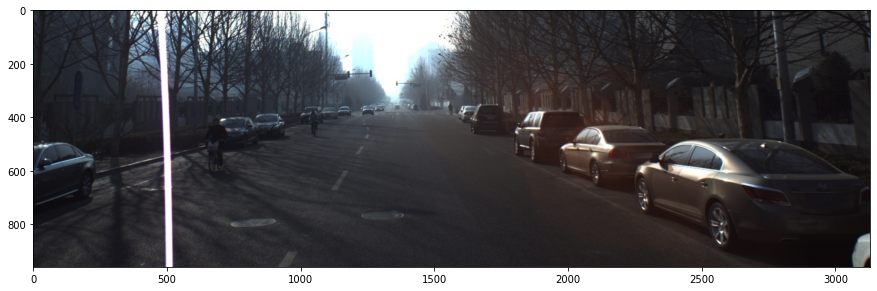

In [31]:
plt.figure(figsize=(15,15))
plt.imshow(img)

In [4]:
from src.objects.features import MRCNNFeatureExtractor,  ObjectDetectionBackbone

In [5]:
f_ext = MRCNNFeatureExtractor(ObjectDetectionBackbone.MASK_RCNN_R_50_FPN)

In [6]:
apollo = ApolloScape(remote=True, username="jellouli")

Remote server password: ········


In [7]:
img, labels = next(iter(apollo))

In [8]:
img2, _ = next(iter(apollo))

In [26]:
a , i = f_ext([img, img2])

/home/ahmed/miniconda3/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
